In [10]:
pip install dlib --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [11]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [12]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
	# return the list of (x, y)-coordinates
	return coords

In [13]:
pip install --upgrade imutils

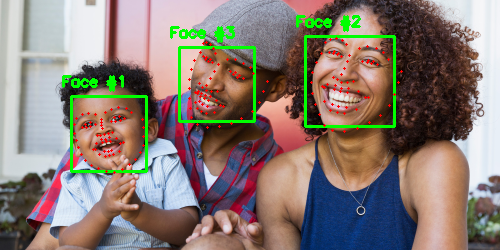

-1

In [19]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

detector = dlib.get_frontal_face_detector()
model = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(model)

# load the input image, resize it, and convert it to grayscale
image = cv2.imread("3person.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
cv2_imshow(image)
cv2.waitKey(0)


In [33]:
import numpy as np
import cv2 as cv
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow

detector = dlib.get_frontal_face_detector()
model = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(model)

cap = cv.VideoCapture("video.mp4")
width  = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MP4V') #codec
out = cv.VideoWriter('output.mp4', fourcc, 20.0, (width,  height))
counter=0
while cap.isOpened():
    ret, frame = cap.read()
    counter+=1
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 1)

    # loop over the face detections
    for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	      shape = predictor(gray, rect)
	      shape = face_utils.shape_to_np(shape)
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	      (x, y, w, h) = face_utils.rect_to_bb(rect)
	      cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
	# show the face number
	      cv2.putText(frame, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	      for (x, y) in shape:
		      cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)

    out.write(frame)
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
print(counter)
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...
720
